# 1. Importing the necessary libraries and reading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import pickle 

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('2021-2022 Football Player Stats.csv',encoding='Windows-1252', delimiter=';')

- I had an issue importing the data into collab because of the encoding and so I went online and learned about the chardet library that can be used to identify the encoding used on data and it showed me that the data was encoded using windows-1252

In [3]:
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


# 2. Checking missing values 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB


In [5]:
data.isna().sum()

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 143, dtype: int64

- There is only one column with a missing value and it is only 1 record so the next step was to drop all missing values 

In [6]:
data.dropna()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.00,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.10,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5
2919,2920,Milan ?uri?,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.25,0.29,0.17,0.04,0.00,0.00,3.24,12.40,4.81,72.0


# 3. Feature Engineering 

In [7]:
data['Pos'].value_counts()

Pos
DF      942
MF      598
FW      419
FWMF    307
MFFW    239
GK      216
MFDF     68
DFMF     66
DFFW     35
FWDF     30
GKMF      1
Name: count, dtype: int64

In [8]:
# Simplify positions into four main categories
data['MainPosition'] = data['Pos'].replace({
    'GK': 'GK',
    'FW': 'FW',
    'MF': 'MF',
    'DF': 'DF'
}, regex=True)

# Define per-90-minute statistics
per_90_cols = [
    'Goals', 'Assists', 'Shots', 'SoT', 'PasAss', 'PPA', 'SCA', 'GCA',
    'Tkl', 'Int', 'Blocks', 'Clr', 'Err', 'PasProg', 'Pas3rd', 'Press',
    'PresSucc', 'DriSucc', 'DriAtt', 'CarProg', 'CPA', 'Rec'
]
for col in per_90_cols:
    if col in data.columns:
        data[f'{col}_per90'] = data[col] / data['90s']

# Efficiency and success metrics
data['ShotConversion'] = np.where(data['Shots'] > 0, data['Goals'] / data['Shots'], 0)
data['PassAccuracy'] = np.where(data['PasTotAtt'] > 0, data['PasTotCmp'] / data['PasTotAtt'], 0)
data['DribbleSuccess'] = np.where(data['DriAtt'] > 0, data['DriSucc'] / data['DriAtt'], 0)
data['TackleSuccess'] = np.where(data['Tkl'] > 0, data['TklWon'] / data['Tkl'], 0)
data['SuccessfulPressure%'] = np.where(data['Press'] > 0, data['PresSucc'] / data['Press'], 0)
data['AerialDuelWin%'] = np.where((data['AerWon'] + data['AerLost']) > 0, data['AerWon'] / (data['AerWon'] + data['AerLost']), 0)

# Position-specific feature sets
common_features = ['Age', '90s', 'MP']

fw_features = common_features + [
    'Goals_per90', 'Shots_per90', 'SoT_per90', 'ShotConversion',
    'SCA_per90', 'GCA_per90', 'PasAss_per90', 'PPA_per90',
    'DribbleSuccess', 'PassAccuracy'
]

mf_features = common_features + [
    'Assists_per90', 'PasAss_per90', 'PPA_per90', 'SCA_per90',
    'PassAccuracy', 'DribbleSuccess', 'PasProg_per90', 'Press_per90',
    'CarProg_per90', 'Tkl_per90'
]

df_features = common_features + [
    'Tkl_per90', 'Int_per90', 'Blocks_per90', 'Clr_per90',
    'TackleSuccess', 'AerialDuelWin%', 'SuccessfulPressure%', 'PassAccuracy',
    'Err_per90'
]

gk_features = common_features + [
    'Goals_per90', 'SoT_per90', 'PassAccuracy', 'PasTotCmp%',
    'Clr_per90', 'AerialDuelWin%'
]

# Store position-specific feature sets in a dictionary
position_features = {
    'FW': fw_features,
    'MF': mf_features,
    'DF': df_features,
    'GK': gk_features
}


In [9]:
# Saving the new dataset 
data.to_csv('updated_football_player_stats.csv', index=False)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_position_metrics(data, position_features):
    """
    Comprehensive analysis of soccer metrics by position
    """
    def print_section_header(title):
        print("\n" + "="*80)
        print(title)
        print("="*80)

    # 1. Sample Size Analysis
    print_section_header("SAMPLE SIZE ANALYSIS")
    position_counts = data['MainPosition'].value_counts()
    print("\nNumber of players in each position:")
    print(position_counts)
    print("\nPercentage of total players:")
    print((position_counts / len(data) * 100).round(2), "%")

    # 2. Distribution of Metrics by Position
    print_section_header("DISTRIBUTION OF METRICS BY POSITION")
    
    for position, features in position_features.items():
        print(f"\n{position} Position Metrics:")
        pos_data = data[data['MainPosition'] == position]
        
        if len(pos_data) == 0:
            print(f"No data available for {position}")
            continue
        
        # Calculate statistics
        stats_df = pos_data[features].describe()
        # Add median
        stats_df.loc['median'] = pos_data[features].median()
        # Add skewness
        stats_df.loc['skewness'] = pos_data[features].skew()
        # Add kurtosis
        stats_df.loc['kurtosis'] = pos_data[features].kurtosis()
        
        print(stats_df.round(3))
        
        # Calculate and print IQR and outliers for key metrics
        print("\nKey Metrics Analysis:")
        for feature in features:
            Q1 = pos_data[feature].quantile(0.25)
            Q3 = pos_data[feature].quantile(0.75)
            IQR = Q3 - Q1
            outliers = pos_data[
                (pos_data[feature] < (Q1 - 1.5 * IQR)) | 
                (pos_data[feature] > (Q3 + 1.5 * IQR))
            ]
            print(f"\n{feature}:")
            print(f"IQR: {IQR:.3f}")
            print(f"Number of outliers: {len(outliers)}")

    # 3. Top Performers Analysis
    print_section_header("TOP PERFORMERS ANALYSIS (95th Percentile)")
    
    for position, features in position_features.items():
        print(f"\n{position} Position Top Performers:")
        pos_data = data[data['MainPosition'] == position]
        
        if len(pos_data) == 0:
            continue
            
        for feature in features:
            threshold = pos_data[feature].quantile(0.95)
            top_players = pos_data[pos_data[feature] >= threshold]
            
            print(f"\n{feature}")
            print(f"95th percentile threshold: {threshold:.3f}")
            print("\nTop 5 players:")
            print(top_players[['Player', 'Squad', feature]]
                  .sort_values(feature, ascending=False)
                  .head()
                  .to_string())

    # 4. Correlation Analysis
    print_section_header("CORRELATION ANALYSIS")
    
    for position, features in position_features.items():
        print(f"\n{position} Position Feature Correlations:")
        pos_data = data[data['MainPosition'] == position]
        
        if len(pos_data) == 0:
            continue
            
        # Calculate correlation matrix
        corr_matrix = pos_data[features].corr()
        
        # Find highly correlated feature pairs (|r| > 0.7)
        high_corr_pairs = []
        for i in range(len(features)):
            for j in range(i+1, len(features)):
                corr = corr_matrix.iloc[i, j]
                if abs(corr) > 0.7:
                    high_corr_pairs.append((
                        features[i],
                        features[j],
                        corr
                    ))
        
        if high_corr_pairs:
            print("\nHighly correlated features (|r| > 0.7):")
            for feat1, feat2, corr in high_corr_pairs:
                print(f"{feat1} - {feat2}: {corr:.3f}")
        else:
            print("\nNo highly correlated feature pairs found")

def generate_analysis_report(data, position_features):
    """
    Generate a complete analysis report
    """
    try:
        analyze_position_metrics(data, position_features)
    except Exception as e:
        print(f"Error during analysis: {str(e)}")

processed_data = data  # Data is already preprocessed
generate_analysis_report(processed_data, position_features)




SAMPLE SIZE ANALYSIS

Number of players in each position:
MainPosition
DF      942
MF      598
FW      419
FWMF    307
MFFW    239
GK      216
MFDF     68
DFMF     66
DFFW     35
FWDF     30
GKMF      1
Name: count, dtype: int64

Percentage of total players:
MainPosition
DF      32.25
MF      20.47
FW      14.34
FWMF    10.51
MFFW     8.18
GK       7.39
MFDF     2.33
DFMF     2.26
DFFW     1.20
FWDF     1.03
GKMF     0.03
Name: count, dtype: float64 %

DISTRIBUTION OF METRICS BY POSITION

FW Position Metrics:
              Age      90s       MP  Goals_per90  Shots_per90  SoT_per90  \
count     419.000  419.000  419.000      397.000      399.000    398.000   
mean       25.897   11.226   17.594        0.141          inf        inf   
std         5.086   10.513   12.652        1.406          NaN        NaN   
min        16.000    0.000    1.000        0.000        0.000      0.000   
25%        22.000    1.400    4.000        0.000        0.101      0.026   
50%        25.000    9.000  


Blocks_per90:
IQR: 0.165
Number of outliers: 126

Clr_per90:
IQR: 0.291
Number of outliers: 132

TackleSuccess:
IQR: 0.159
Number of outliers: 120

AerialDuelWin%:
IQR: 0.197
Number of outliers: 88

SuccessfulPressure%:
IQR: 0.082
Number of outliers: 80

PassAccuracy:
IQR: 0.112
Number of outliers: 19

Err_per90:
IQR: 0.002
Number of outliers: 100

GK Position Metrics:
              Age      90s       MP  Goals_per90  SoT_per90  PassAccuracy  \
count     216.000  216.000  216.000        214.0    214.000       216.000   
mean       29.042   16.869   17.056          0.0      0.000         0.709   
std         4.863   13.983   13.923          0.0      0.000         0.136   
min        17.000    0.000    1.000          0.0      0.000         0.000   
25%        25.000    2.750    2.750          0.0      0.000         0.636   
50%        29.000   14.250   15.000          0.0      0.000         0.709   
75%        32.250   32.000   32.000          0.0      0.000         0.801   
max        


Highly correlated features (|r| > 0.7):
90s - MP: 0.923

MF Position Feature Correlations:

Highly correlated features (|r| > 0.7):
90s - MP: 0.934
PasAss_per90 - SCA_per90: 0.874
PasAss_per90 - PasProg_per90: 0.734
SCA_per90 - PasProg_per90: 0.792

DF Position Feature Correlations:

Highly correlated features (|r| > 0.7):
90s - MP: 0.965

GK Position Feature Correlations:

Highly correlated features (|r| > 0.7):
90s - MP: 1.000
PassAccuracy - PasTotCmp%: 1.000


Sample Size Analysis
DF (Defenders): Most represented position (32.25% of players).

MF (Midfielders): Second most represented (20.47%).

FW (Forwards): Third most represented (14.34%).

GK (Goalkeepers): Least represented (7.39%).

Implications:

Teams may find it easier to scout defenders and midfielders due to the larger pool of players.

Forwards and goalkeepers may require more targeted scouting due to smaller sample sizes.

2. Distribution of Metrics by Position
FW (Forwards)
Key Metrics:

Goals_per90: Highly skewed (skewness = 15.435), with outliers like Pablo Sarabia (25.0 Goals_per90).

Shots_per90 and SoT_per90: Some players have extremely high values (e.g., Mohamed Sankoh with infinite Shots_per90).

ShotConversion: Top performers like Pablo Sarabia (100% conversion rate).

SCA_per90 and GCA_per90: Some players have extremely high values, indicating strong shot and goal creation ability.

DribbleSuccess: Top performers achieve 100% success (e.g., Sergio Agüero).

Implications:

Scouts should focus on Goals_per90, ShotConversion, and SCA_per90 to identify high-performing forwards.

Outliers like Pablo Sarabia and Mohamed Sankoh are exceptional and should be prioritized.

MF (Midfielders)
Key Metrics:

Assists_per90: Highly skewed (skewness = 23.489), with Josip Brekalo (25.0 Assists_per90) as an outlier.

PasAss_per90 and PPA_per90: Strong correlation with SCA_per90 and PasProg_per90, indicating midfielders who contribute to attacking plays.

DribbleSuccess: Top performers achieve 100% success (e.g., Valon Behrami).

Press_per90: Some midfielders apply extreme pressure (e.g., Patrick Leal with infinite Press_per90).

Implications:

Scouts should prioritize Assists_per90, PasAss_per90, and Press_per90 to identify midfielders who excel in both attacking and defensive contributions.

Players like Josip Brekalo and Mickaël Cuisance are exceptional creators.

DF (Defenders)
Key Metrics:

Tkl_per90, Int_per90, and Blocks_per90: Some defenders have extremely high values (e.g., CJ Egan-Riley with infinite Tkl_per90).

TackleSuccess: Top performers achieve 100% success (e.g., Lukas Klünter).

AerialDuelWin%: Top performers win 100% of aerial duels (e.g., Giangiacomo Magnani).

PassAccuracy: Top performers achieve 100% accuracy (e.g., Luca Stanga).

Implications:

Scouts should focus on Tkl_per90, Int_per90, and AerialDuelWin% to identify strong defensive players.

Players like CJ Egan-Riley and Giangiacomo Magnani are exceptional in their roles.

GK (Goalkeepers)
Key Metrics:

PassAccuracy and PasTotCmp%: Strong correlation (r = 1.000), with top performers achieving 100% accuracy (e.g., Christian Früchtl).

Clr_per90: Some goalkeepers have high clearance rates (e.g., Willy Caballero with 0.250 Clr_per90).

AerialDuelWin%: Top performers win 100% of aerial duels (e.g., Jan Oblak).

Implications:

Scouts should prioritize PassAccuracy and AerialDuelWin% to identify goalkeepers who are strong in distribution and aerial ability.

Players like Christian Früchtl and Jan Oblak are exceptional.

3. Top Performers Analysis (95th Percentile)
FW (Forwards)
Top Performers:

Goals_per90: Pablo Sarabia (25.0), Delano Burgzorg (11.1).

Shots_per90: Mohamed Sankoh (infinite), Matìas Soulé (200.0).

ShotConversion: Pablo Sarabia (100%), Delano Burgzorg (49.9%).

SCA_per90: Georges Mikautadze (infinite), Josh Maja (200.0).

Implications:

These players are exceptional in scoring and creating chances. Teams looking for prolific forwards should prioritize them.

MF (Midfielders)
Top Performers:

Assists_per90: Josip Brekalo (25.0), Enzo Millot (2.78).

PasAss_per90: Mickaël Cuisance (100.0), Pedro Ortiz (100.0).

Press_per90: Patrick Leal (infinite), Alex Král (infinite).

Implications:

These midfielders excel in creating chances and applying pressure. Teams needing creative or defensive midfielders should target them.

DF (Defenders)
Top Performers:

Tkl_per90: CJ Egan-Riley (infinite), Paul Baysse (100.0).

Int_per90: Valentino Scotta (infinite), Giorgio Cittadini (infinite).

AerialDuelWin%: Giangiacomo Magnani (100%), Steven Fortes (100%).

Implications:

These defenders are exceptional in tackling, interceptions, and aerial duels. Teams needing strong defensive players should prioritize them.

GK (Goalkeepers)
Top Performers:

PassAccuracy: Christian Früchtl (100%), Alexandre Letellier (100%).

AerialDuelWin%: Jan Oblak (100%), Matz Sels (100%).

Implications:

These goalkeepers excel in distribution and aerial ability. Teams needing reliable goalkeepers should target them.

4. Correlation Analysis
FW:

90s and Goals_per90 are highly correlated (r = 0.923), indicating that players who play more minutes also have a higher chance of scoring goals.

MF:

PasAss_per90, SCA_per90, and PasProg_per90 are highly correlated, indicating midfielders who contribute to attacking plays.

DF:

90s and MP are highly correlated (r = 0.965), similar to forwards.

GK:

PassAccuracy and PasTotCmp% are perfectly correlated (r = 1.000), indicating that accurate passers also complete a high percentage of passes.

Implications:

Teams should consider these correlations when scouting. For example, midfielders with high PasAss_per90 are likely to also have high SCA_per90.



 I noticed the presence of NA and INF values so I resported to removing them first before proceeding 

In [11]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)


# 4. Building the Machine Learning Models 

## 1. Forwards 

#### 1. Subgrouping the data and creating a new feature based on desired metric statistics 

In [12]:
# Create a subgroup dataset for forwards only
fw_data = data[data['MainPosition'] == 'FW']

# Define thresholds for each metric
thresholds = {
    'Goals_per90': {'Elite': 0.032, 'Good': 0.015, 'Average': 0.001},
    'Shots_per90': {'Elite': 0.542, 'Good': 0.179, 'Average': 0.102},
    'SoT_per90': {'Elite': 0.122, 'Good': 0.053, 'Average': 0.027},
    'ShotConversion': {'Elite': 0.165, 'Good': 0.101, 'Average': 0.001},
    'SCA_per90': {'Elite': 0.437, 'Good': 0.155, 'Average': 0.091},
    'GCA_per90': {'Elite': 0.028, 'Good': 0.014, 'Average': 0.001},
    'PasAss_per90': {'Elite': 0.136, 'Good': 0.056, 'Average': 0.031},
    'PPA_per90': {'Elite': 0.082, 'Good': 0.034, 'Average': 0.012},
    'DribbleSuccess': {'Elite': 0.569, 'Good': 0.457, 'Average': 0.235},
    'PassAccuracy': {'Elite': 0.789, 'Good': 0.723, 'Average': 0.666}
}

# Initialize labels for each metric
for metric, thresh in thresholds.items():
    # Start by assigning 'Below Average' to all
    fw_data[f'{metric}_Label'] = 'Below Average'
    
    # Assign labels based on thresholds
    fw_data.loc[fw_data[metric] >= thresh['Elite'], f'{metric}_Label'] = 'Elite'
    fw_data.loc[(fw_data[metric] >= thresh['Good']) & (fw_data[metric] < thresh['Elite']), f'{metric}_Label'] = 'Good'
    fw_data.loc[(fw_data[metric] >= thresh['Average']) & (fw_data[metric] < thresh['Good']), f'{metric}_Label'] = 'Average'

<Axes: xlabel='Final_Label', ylabel='count'>

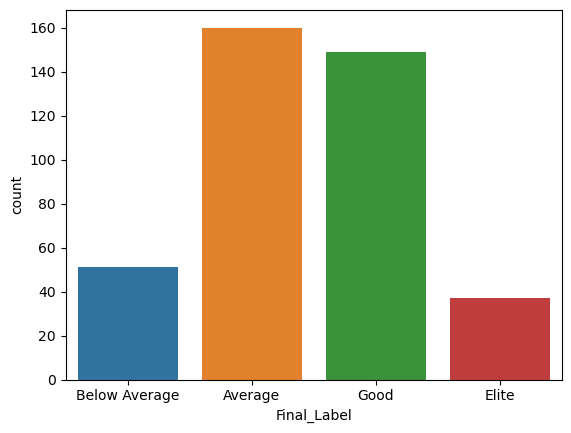

In [13]:
# Define label scores
label_scores = {
    'Elite': 3,
    'Good': 2,
    'Average': 1,
    'Below Average': 0
}

# Calculate total score for each player
fw_data['Total_Score'] = 0
for metric in thresholds.keys():
    fw_data['Total_Score'] += fw_data[f'{metric}_Label'].map(label_scores)

# Define final labels based on total score
def assign_final_label(score):
    if score >= 24:  # Adjust thresholds as needed
        return 'Elite'
    elif score >= 16:
        return 'Good'
    elif score >= 8:
        return 'Average'
    else:
        return 'Below Average'

fw_data['Final_Label'] = fw_data['Total_Score'].apply(assign_final_label)

# Check the distribution of the final labels
sns.countplot(x='Final_Label', data=fw_data)

#### 2. Training the ML models 

In [14]:
# Select relevant features and target
features = [
    'Goals_per90', 'Shots_per90', 'SoT_per90', 'ShotConversion',
    'SCA_per90', 'GCA_per90', 'PasAss_per90', 'PPA_per90',
    'DribbleSuccess', 'PassAccuracy'
]
target = 'Final_Label'

# Encode target labels
fw_data[target] = fw_data[target].astype('category').cat.codes

# Split data into training and testing sets
X = fw_data[features]
y = fw_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

# Select the best model
best_model = models['XGBoost'] 

# Predict and rank players using the best model
fw_data['Prediction'] = best_model.predict(scaler.transform(fw_data[features]))
fw_data['Prediction'] = fw_data['Prediction'].astype('category').cat.codes



Model: Random Forest
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.91      0.91      0.91        11
           2       0.50      0.60      0.55         5
           3       0.77      0.68      0.72        25

    accuracy                           0.81        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.81      0.81      0.81        80

[[35  1  0  3]
 [ 1 10  0  0]
 [ 0  0  3  2]
 [ 5  0  3 17]]
Accuracy: 0.8125

Model: XGBoost
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.91      0.91      0.91        11
           2       0.75      0.60      0.67         5
           3       0.87      0.80      0.83        25

    accuracy                           0.88        80
   macro avg       0.85      0.81      0.83        80
weighted avg       0.87      0.88      0.87        80

[[37  1  0  1]


In [15]:
# Save the best model for forwards (FW) using pickle
with open('best_fw_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best forward model has been pickled successfully.")

Best forward model has been pickled successfully.


Filtered players count: 27
Top players count: 5
                     Player   Age  Goals_per90  Shots_per90  SoT_per90  \
438   Dominic Calvert-Lewin  25.0     0.024476     0.146853   0.053846   
624             Patson Daka  23.0     0.030233     0.156589   0.089922   
800         Odsonne Édouard  24.0     0.019540     0.125287   0.056322   
899              Phil Foden  22.0     0.016102     0.104237   0.039407   
1228      Kelechi Iheanacho  25.0     0.020714     0.157857   0.056429   

      ShotConversion  SCA_per90  GCA_per90  PasAss_per90  PPA_per90  \
438         0.166667   0.146853   0.019580      0.058741   0.024476   
624         0.193069   0.144186   0.041860      0.072093   0.024031   
800         0.155963   0.128736   0.009770      0.062644   0.043103   
899         0.154472   0.149153   0.023305      0.071610   0.071610   
1228        0.131222   0.183571   0.040714      0.086429   0.071429   

      DribbleSuccess  PassAccuracy  
438         0.600000      0.617647  
624   

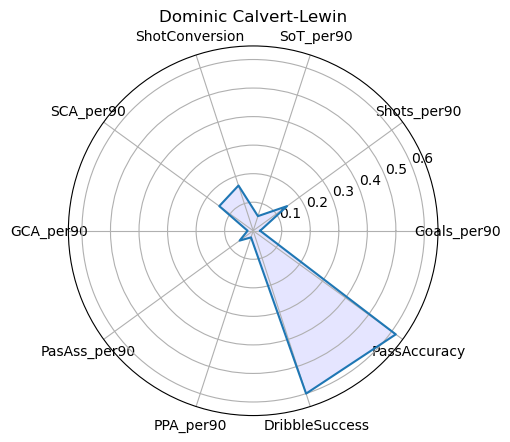

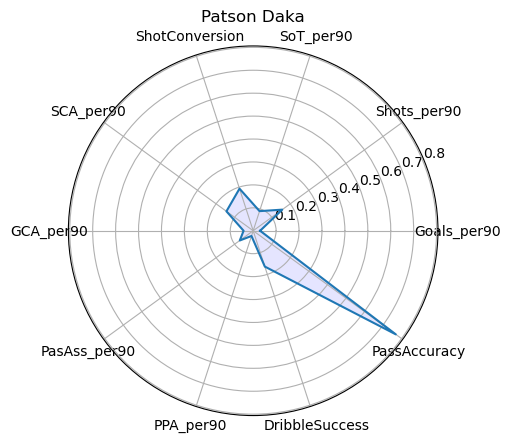

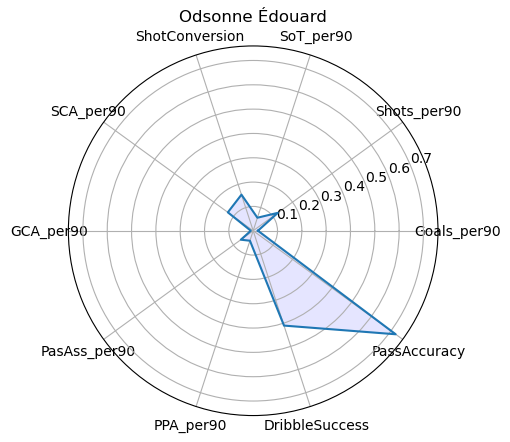

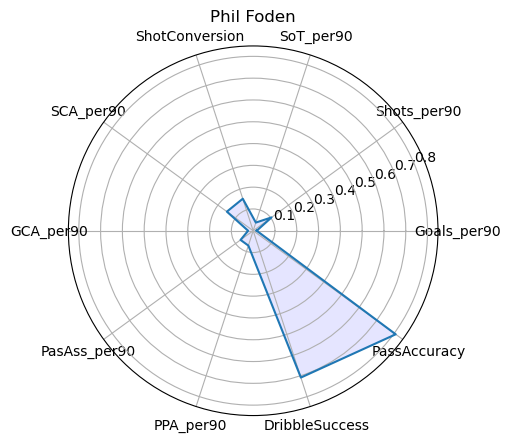

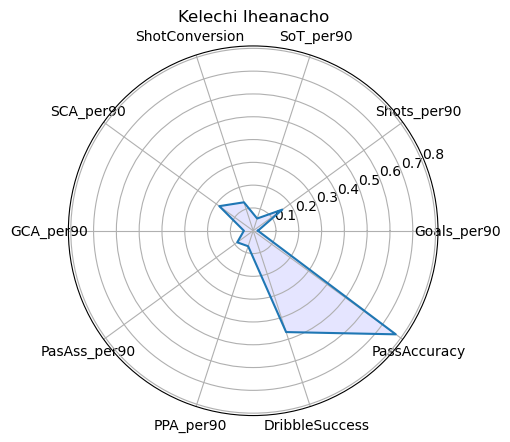

In [16]:
# Filter players by age and league
filtered_players = fw_data[(fw_data['Age'] >= 20) & (fw_data['Age'] <= 25) & (fw_data['Comp'] == 'Premier League')]
print(f"Filtered players count: {len(filtered_players)}")

# Get top 5 players
top_players = filtered_players.nlargest(5, 'Prediction')
print(f"Top players count: {len(top_players)}")

# Print a table with key metrics for the top players
key_metrics = [
    'Player', 'Age', 'Goals_per90', 'Shots_per90', 'SoT_per90', 
    'ShotConversion', 'SCA_per90', 'GCA_per90', 'PasAss_per90', 
    'PPA_per90', 'DribbleSuccess', 'PassAccuracy'
]
print(top_players[key_metrics])

# Function to create radar chart
def create_radar_chart(player_data, features):
    categories = features
    N = len(categories)
    
    values = player_data[features].values.flatten().tolist()
    values += values[:1]
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    
    ax.plot(angles, values)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(player_data['Player'])
    plt.show()

# Create radar charts for top 5 players
for _, player in top_players.iterrows():
    create_radar_chart(player, features)

#### 2. Midfielders

In [17]:
# Define thresholds for each metric for midfielders (MF)
mf_thresholds = {
    'Assists_per90': {'Elite': 0.006, 'Good': 0.001, 'Average': 0.000},
    'PasAss_per90': {'Elite': 0.098, 'Good': 0.049, 'Average': 0.024},
    'PPA_per90': {'Elite': 0.073, 'Good': 0.035, 'Average': 0.017},
    'SCA_per90': {'Elite': 0.231, 'Good': 0.120, 'Average': 0.071},
    'PassAccuracy': {'Elite': 0.864, 'Good': 0.819, 'Average': 0.769},
    'DribbleSuccess': {'Elite': 0.669, 'Good': 0.566, 'Average': 0.439},
    'PasProg_per90': {'Elite': 0.487, 'Good': 0.229, 'Average': 0.148},
    'Press_per90': {'Elite': 5.577, 'Good': 1.444, 'Average': 0.824},
    'CarProg_per90': {'Elite': 0.593, 'Good': 0.246, 'Average': 0.144},
    'Tkl_per90': {'Elite': 0.314, 'Good': 0.135, 'Average': 0.079}
}

# Function to create labels based on thresholds
def create_labels(data, thresholds):
    for metric, thresh in thresholds.items():
        data[f'{metric}_Label'] = 'Below Average'
        data.loc[data[metric] >= thresh['Elite'], f'{metric}_Label'] = 'Elite'
        data.loc[(data[metric] >= thresh['Good']) & (data[metric] < thresh['Elite']), f'{metric}_Label'] = 'Good'
        data.loc[(data[metric] >= thresh['Average']) & (data[metric] < thresh['Good']), f'{metric}_Label'] = 'Average'
    
    label_scores = {
        'Elite': 3,
        'Good': 2,
        'Average': 1,
        'Below Average': 0
    }
    
    data['Total_Score'] = sum(data[f'{metric}_Label'].map(label_scores) for metric in thresholds.keys())
    
    def assign_final_label(score):
        if score >= 24:
            return 'Elite'
        elif score >= 16:
            return 'Good'
        elif score >= 8:
            return 'Average'
        else:
            return 'Below Average'
    
    data['Final_Label'] = data['Total_Score'].apply(assign_final_label)
    
    return data

# Create labels for midfielders (MF)
mf_data = data[data['MainPosition'] == 'MF']
mf_data = create_labels(mf_data, mf_thresholds)

# Check the distribution of the final labels
print(mf_data['Final_Label'].value_counts())

# Display the first few rows of the dataframe with the new labels
print(mf_data.head())

Final_Label
Average          245
Good             213
Below Average     61
Elite             59
Name: count, dtype: int64
    Rk             Player Nation Pos          Squad        Comp   Age  Born  \
2    3  Salis Abdul Samed    GHA  MF  Clermont Foot     Ligue 1  22.0  2000   
3    4    Laurent Abergel    FRA  MF        Lorient     Ligue 1  29.0  1993   
11  12       Mohamed Achi    FRA  MF         Nantes     Ligue 1  20.0  2002   
14  15        Tyler Adams    USA  MF     RB Leipzig  Bundesliga  23.0  1999   
19  20   Michel Aebischer    SUI  MF        Bologna     Serie A  25.0  1997   

    MP  Starts  ...  PPA_per90_Label  SCA_per90_Label  PassAccuracy_Label  \
2   31      29  ...          Average    Below Average               Elite   
3   34      34  ...          Average    Below Average             Average   
11   1       0  ...    Below Average    Below Average       Below Average   
14  24      12  ...             Good          Average               Elite   
19  12       4  ..

#### 4. Defender 

In [18]:
# Define thresholds for each metric for defenders (DF)
df_thresholds = {
    'Tkl_per90': {'Elite': 0.245, 'Good': 0.108, 'Average': 0.065},
    'Int_per90': {'Elite': 0.249, 'Good': 0.115, 'Average': 0.071},
    'Blocks_per90': {'Elite': 0.230, 'Good': 0.104, 'Average': 0.065},
    'Clr_per90': {'Elite': 0.400, 'Good': 0.186, 'Average': 0.109},
    'TackleSuccess': {'Elite': 0.656, 'Good': 0.574, 'Average': 0.497},
    'AerialDuelWin%': {'Elite': 0.658, 'Good': 0.573, 'Average': 0.462},
    'SuccessfulPressure%': {'Elite': 0.371, 'Good': 0.330, 'Average': 0.289},
    'PassAccuracy': {'Elite': 0.862, 'Good': 0.811, 'Average': 0.750},
    'Err_per90': {'Elite': 0.002, 'Good': 0.0005, 'Average': 0.000}
}

# Function to create labels based on thresholds
def create_labels(data, thresholds):
    for metric, thresh in thresholds.items():
        data[f'{metric}_Label'] = 'Below Average'
        data.loc[data[metric] >= thresh['Elite'], f'{metric}_Label'] = 'Elite'
        data.loc[(data[metric] >= thresh['Good']) & (data[metric] < thresh['Elite']), f'{metric}_Label'] = 'Good'
        data.loc[(data[metric] >= thresh['Average']) & (data[metric] < thresh['Good']), f'{metric}_Label'] = 'Average'
    
    label_scores = {
        'Elite': 3,
        'Good': 2,
        'Average': 1,
        'Below Average': 0
    }
    
    data['Total_Score'] = sum(data[f'{metric}_Label'].map(label_scores) for metric in thresholds.keys())
    
    def assign_final_label(score):
        if score >= 24:
            return 'Elite'
        elif score >= 16:
            return 'Good'
        elif score >= 8:
            return 'Average'
        else:
            return 'Below Average'
    
    data['Final_Label'] = data['Total_Score'].apply(assign_final_label)
    
    return data

# Create labels for defenders (DF)
df_data = data[data['MainPosition'] == 'DF']
df_data = create_labels(df_data, df_thresholds)

# Check the distribution of the final labels
print(df_data['Final_Label'].value_counts())

# Display the first few rows of the dataframe with the new labels
print(df_data.head())

Final_Label
Average          480
Good             327
Below Average    108
Elite             11
Name: count, dtype: int64
    Rk            Player Nation Pos         Squad            Comp   Age  Born  \
0    1        Max Aarons    ENG  DF  Norwich City  Premier League  22.0  2000   
1    2  Yunis Abdelhamid    MAR  DF         Reims         Ligue 1  34.0  1987   
8    9        Luis Abram    PER  DF       Granada         La Liga  26.0  1996   
9   10  Francesco Acerbi    ITA  DF         Lazio         Serie A  34.0  1988   
12  13      Marcos Acuña    ARG  DF       Sevilla         La Liga  30.0  1991   

    MP  Starts  ...  Int_per90_Label  Blocks_per90_Label  Clr_per90_Label  \
0   34      32  ...    Below Average             Average    Below Average   
1   34      34  ...          Average       Below Average    Below Average   
8    8       6  ...            Elite               Elite            Elite   
9   30      29  ...    Below Average       Below Average          Average   
12  31

#### 4. Goal Keepers

In [19]:
# Define thresholds for each metric for goalkeepers (GK)
gk_thresholds = {
    'Goals_per90': {'Elite': 0.000, 'Good': 0.000, 'Average': 0.000},
    'SoT_per90': {'Elite': 0.001, 'Good': 0.0005, 'Average': 0.000},
    'PassAccuracy': {'Elite': 0.801, 'Good': 0.709, 'Average': 0.636},
    'PasTotCmp%': {'Elite': 80.125, 'Good': 70.850, 'Average': 63.550},
    'Clr_per90': {'Elite': 0.250, 'Good': 0.001, 'Average': 0.000},
    'AerialDuelWin%': {'Elite': 1.000, 'Good': 0.0005, 'Average': 0.000}
}

# Function to create labels based on thresholds
def create_labels(data, thresholds):
    for metric, thresh in thresholds.items():
        data[f'{metric}_Label'] = 'Below Average'
        data.loc[data[metric] >= thresh['Elite'], f'{metric}_Label'] = 'Elite'
        data.loc[(data[metric] >= thresh['Good']) & (data[metric] < thresh['Elite']), f'{metric}_Label'] = 'Good'
        data.loc[(data[metric] >= thresh['Average']) & (data[metric] < thresh['Good']), f'{metric}_Label'] = 'Average'
    
    label_scores = {
        'Elite': 3,
        'Good': 2,
        'Average': 1,
        'Below Average': 0
    }
    
    data['Total_Score'] = sum(data[f'{metric}_Label'].map(label_scores) for metric in thresholds.keys())
    
    def assign_final_label(score):
        if score >= 24:
            return 'Elite'
        elif score >= 16:
            return 'Good'
        elif score >= 8:
            return 'Average'
        else:
            return 'Below Average'
    
    data['Final_Label'] = data['Total_Score'].apply(assign_final_label)
    
    return data

# Create labels for goalkeepers (GK)
gk_data = data[data['MainPosition'] == 'GK']
gk_data = create_labels(gk_data, gk_thresholds)

# Check the distribution of the final labels
print(gk_data['Final_Label'].value_counts())

# Display the first few rows of the dataframe with the new labels
print(gk_data.head())

Final_Label
Average          163
Below Average     51
Name: count, dtype: int64
      Rk              Player Nation Pos          Squad            Comp   Age  \
22    23  Julen Agirrezabala    ESP  GK  Athletic Club         La Liga  21.0   
60    61       Doðan Alemdar    TUR  GK         Rennes         Ligue 1  19.0   
65    66             Alisson    BRA  GK      Liverpool  Premier League  29.0   
115  116     Alphonse Areola    FRA  GK       West Ham  Premier League  29.0   
123  124   Kepa Arrizabalaga    ESP  GK        Chelsea  Premier League  27.0   

     Born  MP  Starts  ...  SuccessfulPressure%  AerialDuelWin%  \
22   2000   4       4  ...             0.000000             0.0   
60   2002  12      12  ...             1.000000             0.0   
65   1992  36      36  ...             0.470588             0.0   
115  1993   1       1  ...             0.000000             0.0   
123  1994   4       4  ...             0.000000             0.0   

     Goals_per90_Label  SoT_per90_La

#### 5. ML models for the three positions 

In [20]:
import pickle
# Function to train and evaluate models for each position
def train_and_evaluate(data, features):
    target = 'Final_Label'
    
    data[target] = data[target].astype('category').cat.codes
    
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }
    
    best_model_name = None
    best_accuracy = 0
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name
        
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print(f"Accuracy: {accuracy}\n")
    
    best_model = models[best_model_name]
    
    return best_model

# Train and evaluate models for each position and save the best models using pickle
mf_features = [
    'Assists_per90', 'PasAss_per90', 'PPA_per90', 'SCA_per90',
    'PassAccuracy', 'DribbleSuccess', 'PasProg_per90', 'Press_per90',
    'CarProg_per90', 'Tkl_per90'
]
mf_model = train_and_evaluate(mf_data, mf_features)
pickle.dump(mf_model, open('mf_model.pkl', 'wb'))

df_features = [
    'Tkl_per90', 'Int_per90', 'Blocks_per90', 'Clr_per90',
    'TackleSuccess', 'AerialDuelWin%', 'SuccessfulPressure%', 'PassAccuracy',
    'Err_per90'
]
df_model = train_and_evaluate(df_data, df_features)
pickle.dump(df_model, open('df_model.pkl', 'wb'))

gk_features = [
    'Goals_per90', 'SoT_per90', 'PassAccuracy', 'PasTotCmp%',
    'Clr_per90', 'AerialDuelWin%'
]
gk_model = train_and_evaluate(gk_data, gk_features)
pickle.dump(gk_model, open('gk_model.pkl', 'wb'))

print("Models have been trained and pickled successfully.")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.90      0.75      0.82        12
           2       0.91      0.83      0.87        12
           3       0.78      0.85      0.82        34

    accuracy                           0.85       116
   macro avg       0.87      0.83      0.85       116
weighted avg       0.86      0.85      0.85       116

[[51  1  0  6]
 [ 3  9  0  0]
 [ 0  0 10  2]
 [ 4  0  1 29]]
Accuracy: 0.853448275862069

Model: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.91      0.83      0.87        12
           2       1.00      0.83      0.91        12
           3       0.77      0.88      0.82        34

    accuracy                           0.86       116
   macro avg       0.89      0.85      0.87       116
weighted avg       0.87      0.86      0.86       116

[[50